In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global Temperatures

In this notebook, we seek to find a model which would predict average temperature over the course of the year for various cities around the world.

We start by using the following expression for the earth-sun distance:

$$r_{ES} = 1.0 - 0.01672 \cos \left( \frac{2 \pi}{T} (t - 4) \right)$$

where $T$ is the sidereal year, $t$ is the day of the year, and $r_{ES}$ is the earth-sun distance in astronomical units (A.U.). We then use the following expression for the relative power received from the sun:

$$\frac{P}{P_0} = \frac{1}{r_{ES}^2}$$

where $P_0$ is the power received from the sun at the earth's perihelion. We then use the following expression for the angle of the sun above the horizon:

$$\theta = \theta_0 \cos \left( \frac{2 \pi}{T} (t + 10) \right)$$

where $\theta_0$ is the tilt angle of the earth.

We then use the following expression for the temperature:

$$T = T_0 + \frac{P}{P_0} cos(\theta) \sqrt{\frac{L}{12}}$$

where $T_0$ is the average temperature at the earth's perihelion, and $L$ is the length of the day in hours.    

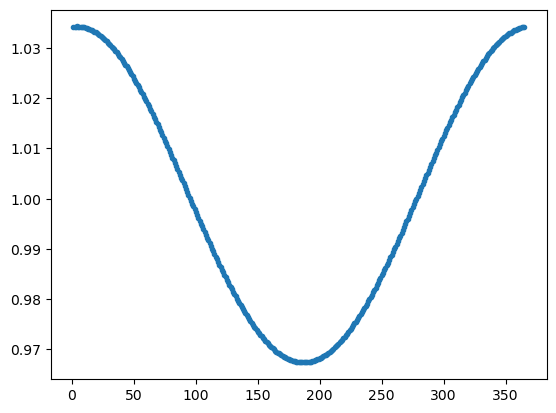

In [2]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

plt.plot(dayOfYear,relPower,'.')

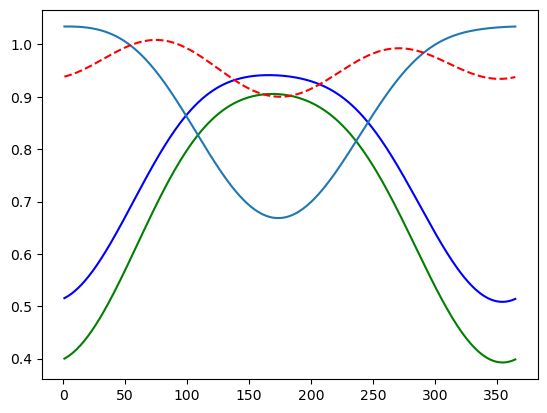

In [3]:
# tilt angle of the earth in 2020
tiltAngle = -23.44*np.pi/180.0

angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))

angleNewportNews = 37.0871*np.pi/180.0 - angle
angleKingston = 44.2312*np.pi/180.0 - angle
angleRio = -22.9068*np.pi/180.0 - angle
angleEquador = 1.8312*np.pi/180.0 - angle

#plt.plot(dayOfYear,angleNewportNews)
#plt.plot(dayOfYear,angleEquator)

plt.plot(dayOfYear,(np.cos(angleNewportNews)*relPower),'b')
plt.plot(dayOfYear,(np.cos(angleKingston)*relPower),'g')
plt.plot(dayOfYear,(np.cos(angleRio)*relPower))
plt.plot(dayOfYear,(np.cos(angleEquador)*relPower),'r--')

# The Sun Class

The Sun Class is a class which can be used to find the sunrise and sunset times for a given location on the earth. The class is based on the following website:

<https://www.esrl.noaa.gov/gmd/grad/solcalc/>


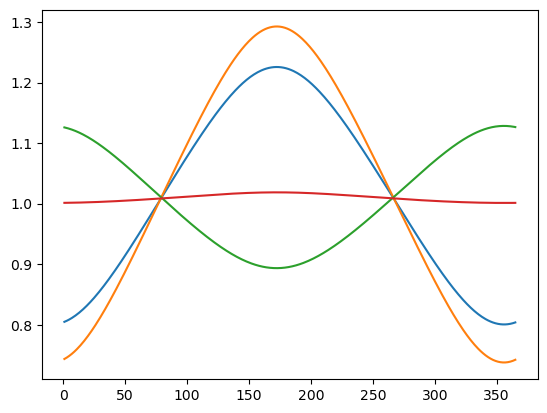

In [5]:
from Sun import Sun

coords = {'longitude': 76.4730, 'latitude': 37.0871}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionNN = dayLength/12.0

coords = {'longitude': 76.4860, 'latitude': 44.2312}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionK = dayLength/12.0

coords = {'longitude': 43.1729, 'latitude': -22.9068}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionRio = dayLength/12.0

coords = {'longitude': 78.1834, 'latitude': 1.8312}
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
#print (dayLength)
#plt.plot(dayOfYear,sunrise)
#plt.plot(dayOfYear,sunset)
#plt.plot(dayOfYear,dayLength)
lengthCorrectionEQ = dayLength/12.0

plt.plot(dayOfYear,lengthCorrectionNN)
plt.plot(dayOfYear,lengthCorrectionK)
plt.plot(dayOfYear,lengthCorrectionRio)
plt.plot(dayOfYear,lengthCorrectionEQ)

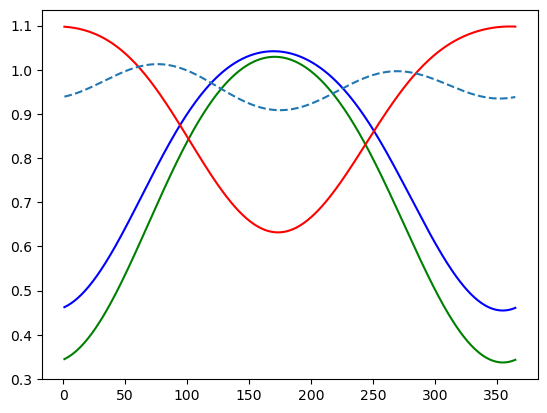

In [6]:
tempNNTheory = (np.cos(angleNewportNews)*relPower*np.sqrt(lengthCorrectionNN))
tempKingstonTheory = (np.cos(angleKingston)*relPower*np.sqrt(lengthCorrectionK))
tempRioTheory = (np.cos(angleRio)*relPower*np.sqrt(lengthCorrectionRio))
tempEquadorTheory = (np.cos(angleEquador)*relPower*np.sqrt(lengthCorrectionEQ))

plt.plot(dayOfYear,tempNNTheory,'b')
plt.plot(dayOfYear,tempKingstonTheory,'g')
plt.plot(dayOfYear,tempRioTheory,'r')
plt.plot(dayOfYear,tempEquadorTheory,'--')

299.31666666666666


Text(0.5, 1.0, 'Global Temperatures - Global Mean = 299.13K')

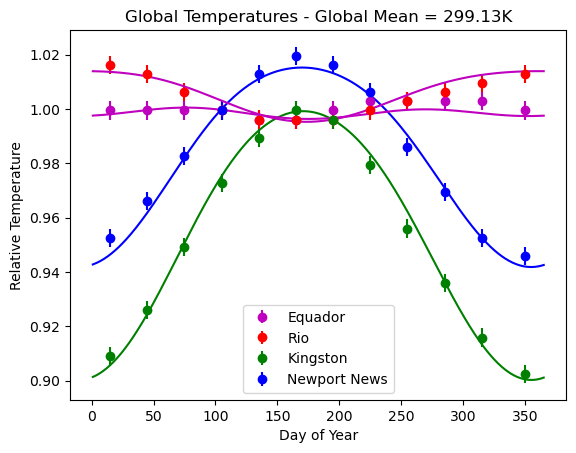

In [34]:
tempRio = np.array([30,31,30,28,26,25,25,25,26,27,28,29])+273.15
tempEquador = np.array([26,26,26,26,26,25,25,26,27,27,27,27])+273.15
tempKingston = np.array([-3,-1,4,11,18,23,26,25,20,13,7,1])+273.15
tempNN = np.array([10,12,16,21,26,30,32,31,28,22,17,12])+273.15

error = np.array([1 for i in range(12)])

mean = tempEquador.mean()
tempRio=tempRio/mean
tempEquador=tempEquador/mean
tempKingston=tempKingston/mean
tempNN = tempNN/mean
error=error/mean

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365
        
print(mean)

tempNNTheoryR = (tempNNTheory-1)/8.0+1.010
tempKingstonTheoryR = (tempKingstonTheory-1)/7.0+0.995
tempRioTheoryR = (tempRioTheory-1)/25.0+1.010
tempEquadorTheoryR = (tempEquadorTheory-1)/25.0+1.000

tempNNTheoryF = (mean*tempNNTheoryR-273.15)*9/5+32
tempKingstonTheoryF = (mean*tempKingstonTheoryR-273.15)*9/5+32
tempRioTheoryF = (mean*tempRioTheoryR-273.15)*9/5+32
tempEquadorTheoryF = (mean*tempEquadorTheoryR-273.15)*9/5+32

tempNNF = (mean*tempNN-273.15)*9/5+32
tempKingstonF = (mean*tempKingston-273.15)*9/5+32
tempRioF = (mean*tempRio-273.15)*9/5+32
tempEquadorF = (mean*tempEquador-273.15)*9/5+32

plt.errorbar(month,tempEquador,yerr=error,fmt='mo', label='Equador')
plt.errorbar(month,tempRio,yerr=error,fmt='ro', label='Rio')
plt.errorbar(month,tempKingston,yerr=error,fmt='go', label='Kingston')
plt.errorbar(month,tempNN,yerr=error,fmt='bo', label='Newport News')
plt.plot(dayOfYear,tempNNTheoryR,'b')
plt.plot(dayOfYear,tempKingstonTheoryR,'g')
plt.plot(dayOfYear,tempRioTheoryR,'m')
plt.plot(dayOfYear,tempEquadorTheoryR,'m')
plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Relative Temperature')
plt.title('Global Temperatures - Global Mean = 299.13K')

Text(0.5, 1.0, 'Global Temperatures - Global Mean = 79.1F')

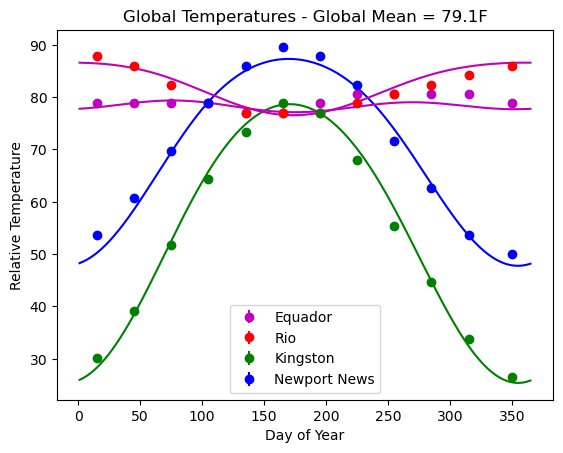

In [36]:
plt.errorbar(month,tempEquadorF,yerr=error,fmt='mo', label='Equador')
plt.errorbar(month,tempRioF,yerr=error,fmt='ro', label='Rio')
plt.errorbar(month,tempKingstonF,yerr=error,fmt='go', label='Kingston')
plt.errorbar(month,tempNNF,yerr=error,fmt='bo', label='Newport News')
plt.plot(dayOfYear,tempNNTheoryF,'b')
plt.plot(dayOfYear,tempKingstonTheoryF,'g')
plt.plot(dayOfYear,tempRioTheoryF,'m')
plt.plot(dayOfYear,tempEquadorTheoryF,'m')
plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Relative Temperature')
plt.title('Global Temperatures - Global Mean = 79.1F')